<a href="https://colab.research.google.com/github/JSOrtegaB/NavegacionAutonoma_Equipo5/blob/main/Actividad_4_1_Clasificacion_Keras_Equipo05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 4.1 - Ejercicio de clasificación con Keras
## Equipo 5
 Juan Sebastián Ortega Briones | A01794327

 Carlos de Jesús Méndez Tornero | A01794879

 Enrique Correa Herrerías | A01794879

 Carlos Mario Larrahondo Valencia | A01794031


# Se cargan las bibliotecas necesarias

In [ ]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from skimage.feature import hog
from sklearn.metrics import classification_report, confusion_matrix

# Se importan los dos datasets
### https://docs.python.org/3/library/glob.html

In [ ]:
# Se si no existe se descarga el dataset
%%capture
if not os.path.exists('/content/DC-ped-dataset_base.zip/'):
  !wget -c https://jsob.blob.core.windows.net/personal/DC-ped-dataset_base.zip

if not os.path.exists('/content/DC-ped-dataset_base/'):
  !unzip DC-ped-dataset_base.zip


In [ ]:
# Se importan las imagenes
import glob

peaton = glob.glob("DC-ped-dataset_base/**/ped_examples/*.pgm")
no_peaton = glob.glob("DC-ped-dataset_base/**/non-ped_examples/*.pgm")
print("Numero de imagenes con peatones",len(peaton))
print("Numero de imagenes sin peatones",len(no_peaton))

Numero de imagenes con peatones 24000
Numero de imagenes sin peatones 25000


In [ ]:
# Tamaño de las imagenes
mpimg.imread(peaton[0])

array([[234, 230, 232, 227, 228, 229, 229, 229, 226, 225, 228, 224, 152,
         96, 158, 232, 229, 229],
       [239, 237, 238, 239, 241, 237, 237, 238, 238, 237, 240, 230, 155,
        170, 221, 243, 241, 241],
       [240, 240, 243, 240, 240, 239, 241, 239, 237, 239, 238, 238, 225,
        214, 218, 213, 215, 210],
       [117, 118, 115, 113, 112, 110, 115, 111, 118, 118, 109,  95, 108,
        107, 103,  95,  93,  93],
       [ 69,  73,  71,  69,  71,  77, 112,  97,  88,  98,  98,  82,  92,
        104, 102,  96,  95,  89],
       [ 68,  71,  71,  73,  69,  71,  85,  81,  85,  84,  79,  73,  87,
        101, 100,  93,  93,  90],
       [ 65,  65,  69,  71,  68,  68,  77,  81,  99, 103, 104,  85,  83,
        100,  98,  91,  93,  90],
       [ 69,  68,  68,  68,  67,  74,  83,  80,  91,  95, 101,  88,  86,
        101,  98,  94,  94,  91],
       [ 72,  67,  68,  66,  78,  92,  92,  82,  81,  75,  86,  91, 104,
        107,  98,  98,  95,  93],
       [ 65,  62,  63,  70, 104,  98,  81,  83,  79, 111, 165,  84,  90,
        104, 105,  95,  95,  92],
       [ 66,  61,  64, 101, 145, 128,  87,  78,  75,  95, 105,  93,  91,
         84,  83,  88,  93,  91],
       [ 63,  63,  70,  89, 106, 137,  87,  78,  69,  66,  73,  79,  90,
         80,  81,  87,  94,  92],
       [ 65,  74,  80,  72,  75,  85,  78,  78,  72,  71,  67,  74,  84,
         88,  84,  84,  95,  94],
       [ 87,  95,  75,  66,  63,  67,  75,  74,  71,  69,  65,  64,  70,
         72,  75,  80,  96,  95],
       [ 99,  97,  88,  76,  68,  67,  73,  74,  71,  69,  68,  63,  61,
         65,  70,  88,  96,  98],
       [ 83,  89,  98,  95,  82,  71,  71,  75,  73,  73,  74,  68,  65,
         76,  91,  98, 102,  99],
       [ 79,  91,  92,  88,  76,  74,  72,  76,  74,  75,  77,  75,  71,
         80,  99, 100, 104, 102],
       [ 84,  96,  93,  91,  73,  71,  69,  70,  71,  77,  77,  75,  75,
         82, 100, 103, 105, 105],
       [ 87,  85,  81,  81,  71,  70,  75,  74,  73,  76,  74,  74,  74,
         85,  99, 103, 105, 107],
       [ 92,  87,  86,  83,  81,  76,  77,  72,  75,  75,  74,  75,  76,
         84,  98, 101, 103, 105],
       [110, 113, 111,  95,  77,  77,  76,  69,  73,  77,  77,  75,  75,
         84,  96,  99, 100, 101],
       [112, 114, 114,  94,  80,  78,  77,  66,  71,  77,  77,  75,  75,
         84,  90,  92,  92,  93],
       [105, 105, 103,  90,  80,  84,  77,  62,  71,  77,  76,  75,  77,
        107, 123, 122, 121, 125],
       [140, 138, 137, 101,  75,  76,  69,  64,  74,  77,  76,  74,  79,
        130, 145, 140, 144, 145],
       [135, 129, 131,  88,  65,  61,  60,  89,  88,  62,  61,  60,  88,
        136, 138, 138, 138, 139],
       [155, 159, 157,  88,  60,  59,  59, 125, 118,  57,  58,  62, 113,
        156, 159, 158, 154, 159],
       [153, 153, 155,  91,  60,  58,  59, 103, 134,  59,  61,  65, 122,
        153, 154, 158, 156, 153],
       [154, 155, 151, 101,  60,  57,  60,  74, 136,  64,  64,  66, 122,
        154, 156, 153, 154, 156],
       [153, 151, 152, 134,  69,  57,  57,  58, 119,  76,  63,  64, 119,
        150, 151, 156, 158, 154],
       [144, 144, 144, 145, 109,  59,  57,  57,  77,  80,  62,  63, 119,
        151, 150, 149, 144, 148],
       [154, 153, 154, 149, 143,  86,  58,  57,  60,  60,  60,  64, 134,
        155, 150, 154, 158, 159],
       [141, 140, 142, 144, 145, 133,  80,  58,  58,  59,  59,  71, 135,
        150, 153, 153, 151, 146],
       [150, 151, 148, 144, 140, 144,  95,  59,  60,  56,  62, 101, 153,
        155, 153, 151, 148, 156],
       [143, 141, 143, 148, 148, 129,  72,  64,  94,  63,  72, 123, 143,
        139, 145, 151, 148, 150],
       [135, 136, 135, 131, 122, 114, 101, 106, 117,  91,  86, 106, 128,
        134, 139, 143, 143, 140],
       [128, 130, 128, 125, 121, 124, 125, 123, 122, 123, 123, 120, 122,
        127, 123, 125, 126, 121]], dtype=uint8)

# Se extraen las features del HOG para ambos tipos de datos

In [ ]:
# Se actualizaron los nombre de variables para hacer coincidencia con peatones
peaton_hog_accum = []

for i in peaton:
    img_gray = mpimg.imread(i)
    # Se comentó esta línea ya que el dataset contenía las imágenes en escala de grises
    #img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)

    # Aquí vemos los cambios mencionados anteriormente en la función de hog para obtener features, de lo contrario nos daban 0
    peaton_hog_feature, peaton_hog_img = hog(img_gray,
                                               orientations = 9,
                                               pixels_per_cell = (8,8),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)

    peaton_hog_accum.append(peaton_hog_feature)

In [ ]:
X_peaton = np.vstack(peaton_hog_accum).astype(np.float64)
y_peaton = np.ones(len(X_peaton))

In [ ]:
X_peaton.shape

(24000, 108)

In [ ]:
y_peaton.shape

(24000,)

In [ ]:
# Se actualizaron los nombre de variables para hacer coincidencia con peatones
nopeaton_hog_accum = []

for i in no_peaton:
    img_gray = mpimg.imread(i)
    # Se comentó esta línea ya que el dataset contenía las imágenes en escala de grises
    #img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)

    # Aquí vemos los cambios mencionados anteriormente en la función de hog para obtener features, de lo contrario nos daban 0
    nopeaton_hog_feature, nopeaton_hog_img = hog(img_gray,
                                               orientations = 9,
                                               pixels_per_cell = (8,8),
                                               cells_per_block = (2,2),
                                               transform_sqrt = False,
                                               visualize = True,
                                               feature_vector = True)

    nopeaton_hog_accum.append(nopeaton_hog_feature)

In [ ]:
X_nopeaton = np.vstack(nopeaton_hog_accum).astype(np.float64)
y_nopeaton = np.zeros(len(X_nopeaton))

In [ ]:
X_nopeaton.shape

(25000, 108)

In [ ]:
y_nopeaton.shape

(25000,)

# Se combinan ambos tipos de datos para alimentar a la red neuronal

In [ ]:
X = np.vstack((X_peaton,X_nopeaton))
X.shape

(49000, 108)

In [ ]:
y = np.hstack((y_peaton,y_nopeaton))
y.shape

(49000,)

# Se generan los datos de entrenamiento y de prueba

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape

(34300, 108)

In [ ]:
X_test.shape

(14700, 108)

# Se cargan las bibliotecas necesarias para definir la red neuronal

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(units=128, input_dim=108, activation='relu'))       # Se crea la primera capa con las 108 entradas para coincidir con las caracteristicas de HOG
model.add(Dropout(0.2))                                              # Se agrega un Dropout para evitar overfitting
model.add(Dense(units=256, activation='relu'))                       # Se crea la segunda capa con 256 neuronas
model.add(Dropout(0.2))                                              # Se agrega un Dropout para evitar overfitting
model.add(Dense(units=128, activation='relu'))                       # Se crea la tercera capa con 128 neuronas
model.add(Dense(1, activation='sigmoid'))                            # Se crea la capa de salida con una sola neurona y la función de activación sigmoid para clasificación binaria
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',  metrics=['accuracy'])

In [ ]:
# resumen del model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               13952     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 80001 (312.50 KB)
Trainable params: 80001 

In [ ]:
hist = model.fit(x=X_train, y=y_train, verbose=2, batch_size=256,epochs=100, shuffle='true')  # Se entrena la red

Epoch 1/100
134/134 - 4s - loss: 0.4842 - accuracy: 0.7643 - 4s/epoch - 32ms/step
Epoch 2/100
134/134 - 0s - loss: 0.3798 - accuracy: 0.8284 - 410ms/epoch - 3ms/step
Epoch 3/100
134/134 - 0s - loss: 0.3501 - accuracy: 0.8441 - 426ms/epoch - 3ms/step
Epoch 4/100
134/134 - 0s - loss: 0.3299 - accuracy: 0.8549 - 402ms/epoch - 3ms/step
Epoch 5/100
134/134 - 0s - loss: 0.3195 - accuracy: 0.8606 - 448ms/epoch - 3ms/step
Epoch 6/100
134/134 - 0s - loss: 0.3046 - accuracy: 0.8672 - 418ms/epoch - 3ms/step
Epoch 7/100
134/134 - 0s - loss: 0.2934 - accuracy: 0.8736 - 398ms/epoch - 3ms/step
Epoch 8/100
134/134 - 0s - loss: 0.2826 - accuracy: 0.8785 - 451ms/epoch - 3ms/step
Epoch 9/100
134/134 - 0s - loss: 0.2772 - accuracy: 0.8815 - 394ms/epoch - 3ms/step
Epoch 10/100
134/134 - 0s - loss: 0.2665 - accuracy: 0.8874 - 441ms/epoch - 3ms/step
Epoch 11/100
134/134 - 0s - loss: 0.2629 - accuracy: 0.8893 - 412ms/epoch - 3ms/step
Epoch 12/100
134/134 - 0s - loss: 0.2551 - accuracy: 0.8917 - 445ms/epoch - 

Text(0.5, 0, 'Epoca')

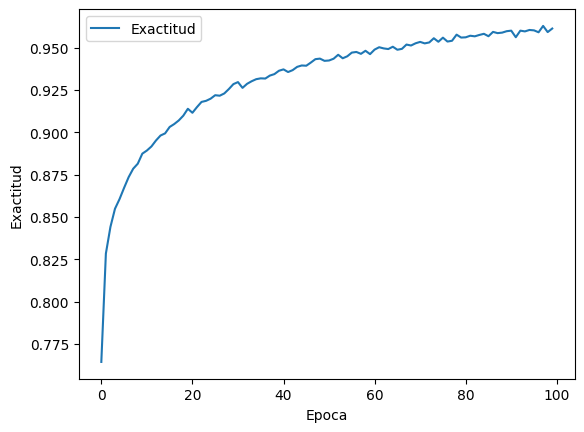

In [ ]:
# Exactitud del modelo
plt.plot(hist.history['accuracy'])
plt.legend(['Exactitud'])
plt.ylabel('Exactitud')
plt.xlabel('Epoca')

Text(0.5, 0, 'Epoca')

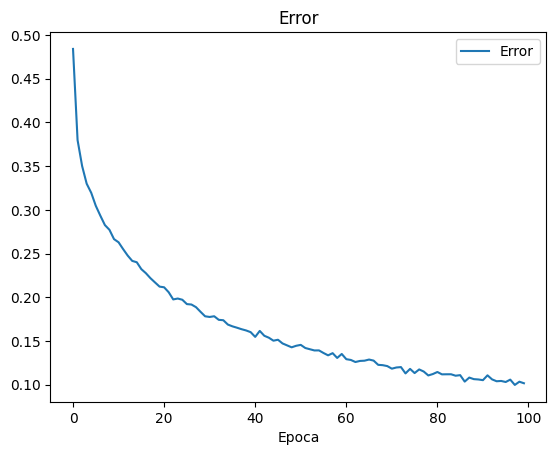

In [ ]:
# Función de pérdida
plt.plot(hist.history['loss'])
plt.legend(['Error'])
plt.title('Error')
plt.xlabel('Epoca')

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1) # Se evalua el modelo con los datos de prueba
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

460/460 [==============================] - 2s 4ms/step - loss: 0.2674 - accuracy: 0.9048
Test loss: 0.2673644423484802
Test accuracy: 0.9047619104385376


460/460 [==============================] - 1s 2ms/step


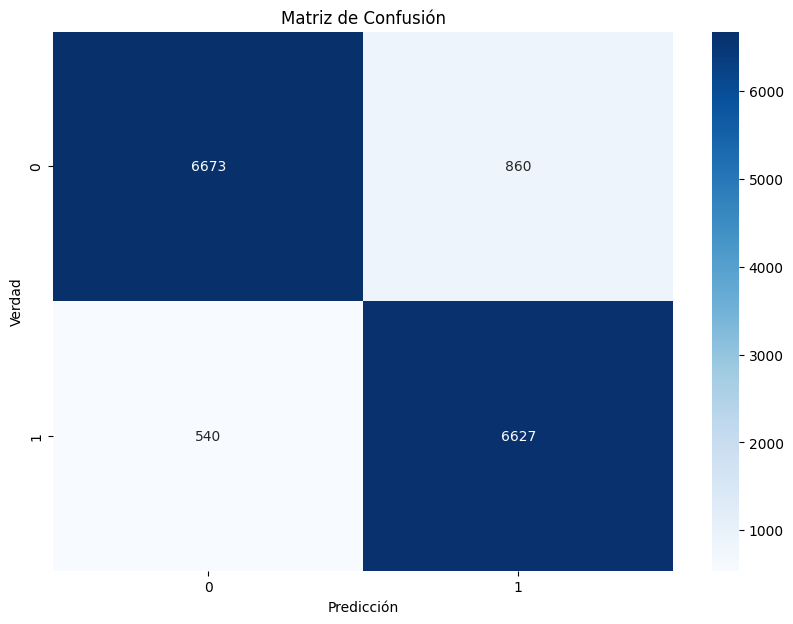

In [ ]:
# Generar predicciones con el modelo
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=["No Peatón", "Peatón"])
print("Reporte de Clasificación:\n", report)

Reporte de Clasificación:
               precision    recall  f1-score   support

   No Peatón       0.93      0.89      0.91      7533
      Peatón       0.89      0.92      0.90      7167

    accuracy                           0.90     14700
   macro avg       0.91      0.91      0.90     14700
weighted avg       0.91      0.90      0.90     14700



# Biografía

- Venturi, L. y Korda, K. (2020). Hands-On Vision and Behavior For Self-Driving Cars. Packt Publishing
- Ranjan, S. y Senthamilarasu S.(2020). Applied Deep Learning and Computer Vision for Self-Driving Cars. Packt Publishing Ltd.
- Antonio, D. (2023). Redes Neuronales para Clasificación Multiclase [Video]. ITESM
- Antonio, D. (2023). Redes Neuronales Profundas para Clasificación Multiclase [Video]. ITESM
- Team, K. (n.d.). Keras documentation: The Sequential model. https://keras.io/guides/sequential_model/

